#  Investigate sequence diversity of esterases using MMSeqs2

### Run MMSeqs2 on promiscuous esterase dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_promis_esterases = pd.read_pickle('data/EnzymeCAGE_train_promiscuous_substrates_EC3p1.pkl')

In [ ]:
import sys
sys.path.append('/home/helen/enzyme-tk/enzymetk')
from enzymetk.similarity_mmseqs_step import MMseqs
from enzymetk.save_step import Save
import pandas as pd

# run in enzymetk environemnt
id_col = 'UniprotID'
seq_col = 'sequence'
output_dir = 'mmseqs2/'

df_promis_esterases << (MMseqs(id_col, seq_col, tmp_dir=output_dir, method='cluster',  args=['--min-seq-id', '0.9', '-c', '0.8', '--cov-mode', '1']) >> Save(f'{output_dir}promiscuous_esterases_mmseqs2_0p9_similarity.pkl'))
df_promis_esterases << (MMseqs(id_col, seq_col, tmp_dir=output_dir, method='cluster',  args=['--min-seq-id', '0.6', '-c', '0.8', '--cov-mode', '1']) >> Save(f'{output_dir}promiscuous_esterases_mmseqs2_0p6_similarity.pkl'))
df_promis_esterases << (MMseqs(id_col, seq_col, tmp_dir=output_dir, method='cluster',  args=['--min-seq-id', '0.4', '-c', '0.8', '--cov-mode', '1']) >> Save(f'{output_dir}promiscuous_esterases_mmseqs2_0p4_similarity.pkl'))

### Embed protein sequences using ESM2

In [4]:
import sys
from enzymetk.embedprotein_esm_step import EmbedESM
from enzymetk.save_step import Save
import pandas as pd

# run in enzymetk environemnt
df_promis_esterases = pd.read_pickle('data/EnzymeCAGE_train_promiscuous_substrates_EC3p1.pkl')
df_filtered = df_promis_esterases.drop_duplicates(subset='UniprotID', keep='first')
id_col = 'UniprotID'
seq_col = 'sequence'
output_dir = 'esm2/'

df_filtered << (EmbedESM(id_col, seq_col, extraction_method='mean', tmp_dir=output_dir) >> Save(f'{output_dir}promiscuous_esterases_esm2_embedded_v2.pkl'))

--------------------------------------------------------------------------------
Running command	conda run -n enzymetk python /home/helen/miniconda3/envs/enzymetk/lib/python3.11/site-packages/enzymetk/esm-extract.py esm2_t33_650M_UR50D esm2//input.fasta esm2/ --include per_tok	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------
Transferred model to GPU
Read esm2/input.fasta with 2643 sequences
Processing 1 of 237 batches (28 sequences)
Processing 2 of 237 batches (28 sequences)
Processing 3 of 237 batches (28 sequences)
Processing 4 of 237 batches (28 sequences)
Processing 5 of 237 batches (28 sequences)
Processing 6 of 237 batches (28 sequences)
Processing 7 of 237 batches (28 sequences)
Processing 8 of 237 batches (

100%|██████████| 2643/2643 [00:03<00:00, 876.60it/s]
/home/helen/miniconda3/envs/enzymetk/lib/python3.11/site-packages/enzymetk/embedprotein_esm_step.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embedding'] = tensors


0 0 0


,RHEA_ID,DIRECTION,MASTER_ID,UniprotID,SMILES,EC number,CANO_RXN_SMILES,sequence,reverse_template,n_seq,...,key,direct_weight,rank_weight_light,rank_weight_hard,substrates,products,number_substrates,number_products,substrates_split,embedding
0,53744,UN,53744,A0A023W421,*P(=O)([O-])OC[C@H]1O[C@@H](N2C=NC3=C(N)N=CN=C...,3.1.1.96,*P(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H...,MKLVVQRVTDASVTVDGAVAGRIGPGIMALVGVTHEDTEEDAAYLA...,[C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...,147,...,*P(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H...,0.758806,0.9,0.500000,*P(=O)([O-])OC[C@H]1O[C@@H](N2C=NC3=C(N)N=CN=C...,*P(=O)([O-])OC[C@H]1O[C@@H](N2C=NC3=C(N)N=CN=C...,1,3,*P(=O)([O-])OC[C@H]1O[C@@H](N2C=NC3=C(N)N=CN=C...,"[0.02359803, -0.0028808287, 0.0125321625, 0.00..."
2,45632,UN,45632,A0A0G2JXT6,CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...,3.1.3.95,CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...,MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...,[C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...,655,...,CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...,0.856662,0.6,0.200000,CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...,CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@H]1[C@H](...,1,2,CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...,"[0.01086533, -0.036436066, 0.023325494, 0.0449..."
6,60388,UN,60388,A0A0H2V660,[H][C@]12COC(=O)[C@]3([H])COC(=O)[C@]([H])(COC...,3.1.1.109,O.O=C1N[C@H]2COC(=O)[C@@H]3COC(=O)[C@H](COC2=O...,MIDKNQTCGVGQDSVPYMICLIHILEEWFGVEQLEDYLNFANYLLW...,[#7:1]-[C:2]-[C;H0;D3;+0:3](-[O-;H0;D1:7])=[O;...,324,...,O.O=C1N[C@H]2COC(=O)[C@@H]3COC(=O)[C@H](COC2=O...,0.712541,1.0,1.000000,[H][C@]12COC(=O)[C@]3([H])COC(=O)[C@]([H])(COC...,O=C1N[C@H](C(=O)[O-])COC(=O)[C@@H]2COC(=O)[C@H...,1,2,[H][C@]12COC(=O)[C@]3([H])COC(=O)[C@]([H])(COC...,"[-0.027480608, -0.11780349, -0.05612977, 0.079..."
10,59264,UN,59264,A0A0H2V760,O=C1N[C@H](C(=O)[O-])COC(=O)[C@H](CO)NC(=O)C2=...,3.1.1.108,O.O=C1N[C@H](C(=O)O)COC(=O)[C@H](CO)NC(=O)c2cc...,MIDKNQTCGVGQDSVPYMICLIHILEEWFGVEQLEDYLNFANYLLW...,[#7:1]-[C:2]-[C;H0;D3;+0:3](-[O-;H0;D1:14])=[O...,324,...,O.O=C1N[C@H](C(=O)O)COC(=O)[C@H](CO)NC(=O)c2cc...,0.816346,1.0,1.000000,O=C1N[C@H](C(=O)[O-])COC(=O)[C@H](CO)NC(=O)C2=...,O=C(N[C@@H](CO)C(=O)[O-])C1=C2O[Fe+]OC2=CC=C1....,2,2,O=C1N[C@H](C(=O)[O-])COC(=O)[C@H](CO)NC(=O)C2=...,"[-0.027480608, -0.11780349, -0.05612977, 0.079..."
17,60413,LR,60412,A0A0H2V871,O=C(N[C@H]1COC(=O)[C@@H](NC(=O)C2=CC=CC(O)=C2O...,3.1.1.107,O.O=C(N[C@H]1COC(=O)[C@@H](NC(=O)c2cccc(O)c2O)...,MYAREYRSTRPHKAIFFHLSCLTLICSAQVYAKPDMRPLGPNIADK...,NaN,318,...,O.O=C(N[C@H]1COC(=O)[C@@H](NC(=O)c2cccc(O)c2O)...,0.750610,1.0,1.000000,O=C(N[C@H]1COC(=O)[C@@H](NC(=O)C2=CC=CC(O)=C2O...,O=C(N[C@@H](COC(=O)[C@H](COC(=O)[C@H](CO)NC(=O...,1,2,O=C(N[C@H]1COC(=O)[C@@H](NC(=O)C2=CC=CC(O)=C2O...,"[0.024387136, -0.027107583, 0.04585238, 0.0170..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,20629,UN,20629,Q9ZV25,*N[C@@H](COP(=O)([O-])[O-])C(*)=O.[H]O[H]>>*N[...,3.1.3.16,*N[C@@H](COP(=O)(O)O)C(*)=O.O>>*N[C@@H](CO)C(*...,MGNGIGKLSKCLTGGAGRNKKPELSILEPDPLDEGLGHSFCYVRPD...,NaN,654,...,*N[C@@H](COP(=O)(O)O)C(*)=O.O>>*N[C@@H](CO)C(*...,0.704179,0.7,0.250000,*N[C@@H](COP(=O)([O-])[O-])C(*)=O,*N[C@@H](CO)C(*)=O.O=P([O-])([O-])O,1,2,*N[C@@H](COP(=O)([O-])[O-])C(*)=O,"[-0.02171734, -0.14350276, 0.056532424, 0.1255..."
9561,20629,UN,20629,Q9ZW21,*N[C@@H](COP(=O)([O-])[O-])C(*)=O.[H]O[H]>>*N[...,3.1.3.16,*N[C@@H](COP(=O)(O)O)C(*)=O.O>>*N[C@@H](CO)C(*...,MAEICYEVVTDACPSSVYESTPAHSRRRPRFQTVMHEDWEKNCKRS...,NaN,362,...,*N[C@@H](COP(=O)(O)O)C(*)=O.O>>*N[C@@H](CO)C(*...,0.704179,0.7,0.250000,*N[C@@H](COP(=O)([O-])[O-])C(*)=O,*N[C@@H](CO)C(*)=O.O=P([O-])([O-])O,1,2,*N[C@@H](COP(=O)([O-])[O-])C(*)=O,"[-0.08587352, -0.11186761, 0.085725434, 0.0702..."
9563,30144,LR,30143,S4TF94,CCCCCCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)CO...,3.1.2.-,CCCCCCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)CO...,MMTPIGIRIRKQIPLSYHYSSIQALLSRFTPTPYNPISNSSSSTQT...,NaN,527,...,CCCCCCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(

In [ ]:
# Integrate mmseqs2 results into one df
import pandas as pd

df_mmseqs2_0p9 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/mmseqs2/promiscuous_esterases_mmseqs2_0p9_similarity.pkl')
df_mmseqs2_0p6 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/mmseqs2/promiscuous_esterases_mmseqs2_0p6_similarity.pkl')
df_mmseqs2_0p4 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/mmseqs2/promiscuous_esterases_mmseqs2_0p4_similarity.pkl')

df_mmseqs2_0p9 = df_mmseqs2_0p9.rename(columns={'mmseqs_representative_cluster_seq' : 'mmseqs_representative_cluster_seq_0p9_similarity'})
df_mmseqs2_0p6 = df_mmseqs2_0p6.rename(columns={'mmseqs_representative_cluster_seq' : 'mmseqs_representative_cluster_seq_0p6_similarity'})
df_mmseqs2_0p4 = df_mmseqs2_0p4.rename(columns={'mmseqs_representative_cluster_seq' : 'mmseqs_representative_cluster_seq_0p4_similarity'})

# Keep only one representative cluster per UniprotID for merge purposes
df_mmseqs2_0p6_dedup = df_mmseqs2_0p6.drop_duplicates(subset='UniprotID')
df_mmseqs2_0p4_dedup = df_mmseqs2_0p4.drop_duplicates(subset='UniprotID')

df_mmseqs2 = df_mmseqs2_0p9.merge(
    df_mmseqs2_0p6_dedup[['UniprotID', 'mmseqs_representative_cluster_seq_0p6_similarity']],
    on='UniprotID', how='left')

df_mmseqs2 = df_mmseqs2.merge(
    df_mmseqs2_0p4_dedup[['UniprotID', 'mmseqs_representative_cluster_seq_0p4_similarity']],
    on='UniprotID', how='left')

#df_mmseqs2.to_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2.pkl')

# Add esm2 embeddings to mmseqs2 pickle files
df_esm2 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/esm2/promiscuous_esterases_esm2_embedded_v2.pkl')
df_mmseqs2_esm2 = df_mmseqs2.merge(df_esm2[['UniprotID', 'embedding']], on='UniprotID', how='left')
#df_mmseqs2_esm2.to_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2.pkl')

### Embed substrates using UniMol

In [ ]:
# Embed substrates using unimol

from enzymetk.embedchem_unimol_step import UniMol
from enzymetk.save_step import Save
import pandas as pd

# run in enzymetk environemnt
df_mmseqs2_esm2 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2.pkl')
df_mmseqs2_esm2 = df_mmseqs2_esm2.head(1000)
smiles_col = 'substrates_split'
output_dir = 'unimol/'

df_mmseqs2_esm2 << (UniMol(smiles_col) >> Save(f'{output_dir}promiscuous_esterases_unimol_embedded.pkl'))

In [ ]:
# Add UniMol embeddings to mmseqs2 pickle files
import pandas as pd

df_unimol = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/unimol/promiscuous_esterases_unimol_embedded_v2.pkl')
df_mmseqs2_esm2 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2.pkl')
df_mmseqs2_esm2 = df_mmseqs2_esm2.merge(df_unimol[['UniprotID', 'unimol_repr']], on='UniprotID', how='left')
#df_mmseqs2_esm2.to_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2_unimol.pkl')

### Calculate pairwise sequence similarity between cluster representatives of MMSeqs2 clusters

In [3]:
from Bio import pairwise2
import numpy as np
import pandas as pd
from sklearn.manifold import MDS

df_unimol = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2_unimol_TEST.pkl')
cluster_col = 'mmseqs_representative_cluster_seq_0p9_similarity'
sequence_col = 'sequence'

def pairwise_cluster_seq_similarity(df, sequence_col, cluster_col): 

    # Get one representative sequence per cluster
    representatives_df = df.groupby(cluster_col).first().reset_index()
    cluster_ids = representatives_df[cluster_col].tolist()
    sequences = representatives_df[sequence_col].tolist()

    def sequence_identity(seq1, seq2):
        alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
        matches = alignments[0][2]
        return matches / max(len(seq1), len(seq2))

    # Compute similarity matrix
    n = len(sequences)
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            sim = sequence_identity(sequences[i], sequences[j])
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim

    # Convert similarity to distance
    distance_matrix = 1 - similarity_matrix

    # Use MDS to embed clusters into 1D (for colormap)
    mds = MDS(n_components=1, dissimilarity='precomputed', random_state=42)
    mds_coords = mds.fit_transform(distance_matrix).flatten()

    # Normalize to [0, 1] for colormap mapping
    mds_norm = (mds_coords - mds_coords.min()) / (mds_coords.max() - mds_coords.min())

    # Map cluster IDs to normalized MDS values
    cluster_color_map = dict(zip(cluster_ids, mds_norm))
    df['mds_seq_similarity'] = df[cluster_col].map(cluster_color_map)

pairwise_cluster_seq_similarity(df_unimol, sequence_col, cluster_col)

/home/helen/miniconda3/envs/promiscuity/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


### Calculate dimensionality reduced ESM2 embeddings

In [12]:
import umap
from sklearn.manifold import TSNE

df_unimol = df_unimol.head(50)

def calculate_dim_reduced_ESM2_embeddings(df, embedding_col = 'embedding', type = 'UMAP'):
    embeddings = np.vstack(df[embedding_col].to_numpy()) 

    if type == 'UMAP': 
        umap_model = umap.UMAP(n_components=2, random_state=42)
        reduced_embeddings = umap_model.fit_transform(embeddings)
        df['UMAP1_esm2'] = reduced_embeddings[:, 0]
        df['UMAP2_esm2'] = reduced_embeddings[:, 1]
    
    elif type == 't-SNE': 
        tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
        tsne_results = tsne.fit_transform(embeddings)
        df['TSNE1_esm2'] = tsne_results[:, 0]
        df['TSNE2_esm2'] = tsne_results[:, 1]

calculate_dim_reduced_ESM2_embeddings(df_unimol, embedding_col = 'embedding', type = 't-SNE')

/home/helen/miniconda3/envs/promiscuity/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/tmp/ipykernel_2394140/4018506495.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TSNE1_esm2'] = tsne_results[:, 0]
/tmp/ipykernel_2394140/4018506495.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TSNE2_esm2'] = tsne_results[:, 1]


### Calculate dimensionality reduced UniMol substrate embeddings

In [ ]:
# Remove rows where any SMILES string in the list contains '*' or is '[H+]'. These cannot be embedded using unimol. 
def is_valid_smiles(smi):
    if not isinstance(smi, str):
        return False
    return '*' not in smi and smi.strip() != '[H+]'

df_unimol = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2_unimol_TEST.pkl')
df_unimol = df_unimol[df_unimol['substrates_split'].apply(is_valid_smiles)].reset_index(drop=True)

In [18]:
from sklearn.decomposition import PCA

def calculate_dim_reduced_unimol_embeddings(df, embedding_column='unimol_repr', reduction='pca'):
  
    processed_embeddings = []
    valid_indices = []
    for i, emb_list in enumerate(df[embedding_column]):
        if isinstance(emb_list, list) and len(emb_list) == 1:
            embedding = emb_list[0]
            if isinstance(embedding, np.ndarray) and embedding.size > 0:
                processed_embeddings.append(embedding.flatten())
                valid_indices.append(i)
            else:
                print(f"Warning: Row {i}: Invalid inner embedding: {embedding}")
        else:
            print(f"Warning: Row {i}: Unexpected embedding format: {emb_list}")

    if not processed_embeddings:
        print("No valid embeddings found.")
        return

    valid_embeddings = np.array(processed_embeddings)
    df_filtered = df.iloc[valid_indices].copy()

    # Dimensionality reduction
    if valid_embeddings.ndim < 2 or valid_embeddings.shape[1] < 2:
        print(f"Valid embeddings have shape {valid_embeddings.shape}, cannot reduce to 2D.")
        return

    n_components = 2
    reduced_embeddings = None

    if reduction.lower() == 'pca':
        pca = PCA(n_components=n_components)
        reduced_embeddings = pca.fit_transform(valid_embeddings)
        df['pca1_unimol'] = reduced_embeddings[:, 0]
        df['pca2_unimol'] = reduced_embeddings[:, 1]


    elif reduction.lower() == 'tsne':
        tsne = TSNE(n_components=n_components, random_state=42, n_iter=300, verbose=0)
        reduced_embeddings = tsne.fit_transform(valid_embeddings)
        df['TSNE1_unimol'] = reduced_embeddings[:, 0]
        df['TSNE2_unimol'] = reduced_embeddings[:, 1]
        
calculate_dim_reduced_unimol_embeddings(df_unimol)

/tmp/ipykernel_2394140/1567039438.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca1_unimol'] = reduced_embeddings[:, 0]
/tmp/ipykernel_2394140/1567039438.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca2_unimol'] = reduced_embeddings[:, 1]


In [ ]:
# Save df
#df_unimol.to_pickle('nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2_unimol_DR.pkly')

### Calculate molecular properties of substrates

In [33]:
# Calculate molecular properties of substrates

from rdkit import Chem
from rdkit.Chem import Descriptors, rdPartialCharges, rdMolDescriptors
import pubchempy as pcp
from tqdm import tqdm
from collections import defaultdict

def get_longest_aliphatic_chain_length(mol):
    """
    Returns the length of the longest aliphatic (non-aromatic, non-ring) carbon chain.
    """
    from rdkit.Chem.rdmolops import GetShortestPath

    max_chain = 0
    atoms = [atom for atom in mol.GetAtoms() if atom.GetSymbol() == 'C' and not atom.GetIsAromatic() and not atom.IsInRing()]
    for i in range(len(atoms)):
        for j in range(i + 1, len(atoms)):
            path = GetShortestPath(mol, atoms[i].GetIdx(), atoms[j].GetIdx())
            # Ensure all atoms in the path are eligible (non-ring, non-aromatic C)
            if all(mol.GetAtomWithIdx(idx).GetSymbol() == 'C' and
                   not mol.GetAtomWithIdx(idx).GetIsAromatic() and
                   not mol.GetAtomWithIdx(idx).IsInRing()
                   for idx in path):
                max_chain = max(max_chain, len(path))
    return max_chain

def get_partialcharge_carbonyl(mol):
    """
    Returns the minimum Gasteiger partial charge among ester carbonyl carbons in the molecule.
    """
    # SMARTS pattern to match ester carbonyl carbon
    ester_carbonyl_smarts = Chem.MolFromSmarts('[CX3](=O)[OX2H0][C]')
    matches = mol.GetSubstructMatches(ester_carbonyl_smarts)

    if not matches:
        return None  # No ester group found

    # Get the index of the carbonyl carbon (first atom in the pattern)
    carbonyl_c_indices = [match[0] for match in matches]

    # Extract partial charges
    charges = []
    for idx in carbonyl_c_indices:
        atom = mol.GetAtomWithIdx(idx)
        charge = float(atom.GetProp('_GasteigerCharge'))
        charges.append(charge)

    return min(charges)  # Most electrophilic carbonyl (lowest charge)

def get_molecular_properties(smiles, include_name=False):
    # Including the name makes it wayy slower.
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Invalid SMILES"

    # Compute Gasteiger charges
    Chem.rdPartialCharges.ComputeGasteigerCharges(mol)

    # Count halogen atoms
    halogen_symbols = ['F', 'Cl', 'Br', 'I']
    halogen_count = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() in halogen_symbols)

    # Extract properties
    properties = {
        "MolWt": Descriptors.MolWt(mol),
        "TPSA": Descriptors.TPSA(mol),
        "MolLogP": Descriptors.MolLogP(mol),
        "HeavyAtoms":  Descriptors.HeavyAtomCount(mol), 
        "HydrogenAcceptors": Descriptors.NumHAcceptors(mol), 
        "HydrogenDonors": Descriptors.NumHDonors(mol), 
        "MaxPartialCharge": float(max(atom.GetProp("_GasteigerCharge") for atom in mol.GetAtoms())),
        "MinPartialCharge": float(min(atom.GetProp("_GasteigerCharge") for atom in mol.GetAtoms())),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol), 
        'FractionCSP3': Descriptors.FractionCSP3(mol),
        'NumAromaticRings': rdMolDescriptors.CalcNumAromaticRings(mol),
        'NumAliphaticRings': rdMolDescriptors.CalcNumAliphaticRings(mol),
        'NumAromaticAtoms': sum(1 for a in mol.GetAtoms() if a.GetIsAromatic()),
        'TotalAtoms': mol.GetNumAtoms(),
        'AromaticAtomFraction': sum(1 for a in mol.GetAtoms() if a.GetIsAromatic()) / mol.GetNumAtoms(),
        'RingCount': Descriptors.RingCount(mol),
        'BalabanJ': Descriptors.BalabanJ(mol),
        'Kappa1': Descriptors.Kappa1(mol),
        'Kappa2': Descriptors.Kappa2(mol),
        'Kappa3': Descriptors.Kappa3(mol),
        'HallKierAlpha': Descriptors.HallKierAlpha(mol),
        'LabuteASA': rdMolDescriptors.CalcLabuteASA(mol),
        "NumHalogenAtoms": halogen_count, 
        "LongestAliphaticChain": get_longest_aliphatic_chain_length(mol), 
        'PartialChargeCarbonyl' : get_partialcharge_carbonyl(mol)
    }
    # Get compound name from PubChem
    if include_name:
        try:
            compound = pcp.get_compounds(smiles, namespace='smiles')[0]
            properties["CompoundName"] = compound.iupac_name
        except IndexError:
            properties["CompoundName"] = "Not Found"

    return properties


properties_df = df_unimol['substrates_split'].apply(get_molecular_properties).apply(pd.Series)
df_unimol = pd.concat([df_unimol, properties_df], axis=1)

### Sequence length distribution

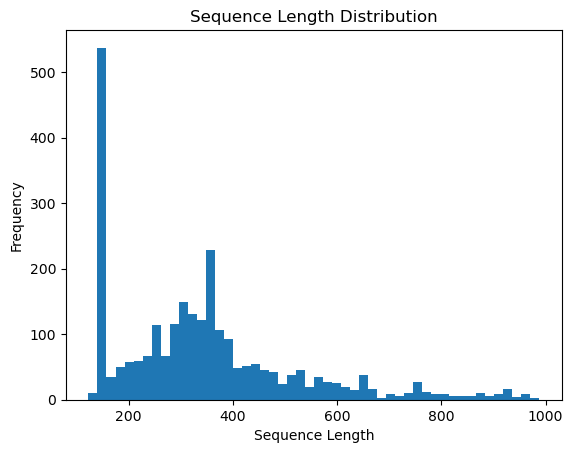

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sequence_length_histogram_from_df(df, sequence_column="sequence"):

    sequence_lengths = df[sequence_column].apply(len)
    plt.hist(sequence_lengths, bins=50)  # Adjust the number of bins as needed
    plt.xlabel("Sequence Length")
    plt.ylabel("Frequency")
    plt.title("Sequence Length Distribution")
    plt.show()

df_mmseqs2_esm2 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2.pkl')
df_unique = df_mmseqs2_esm2.drop_duplicates(subset='UniprotID')
plot_sequence_length_histogram_from_df(df_unique)

### Analysis of sequence diversity using MMseqs2 

Number of unique clusters: 2


([], [])

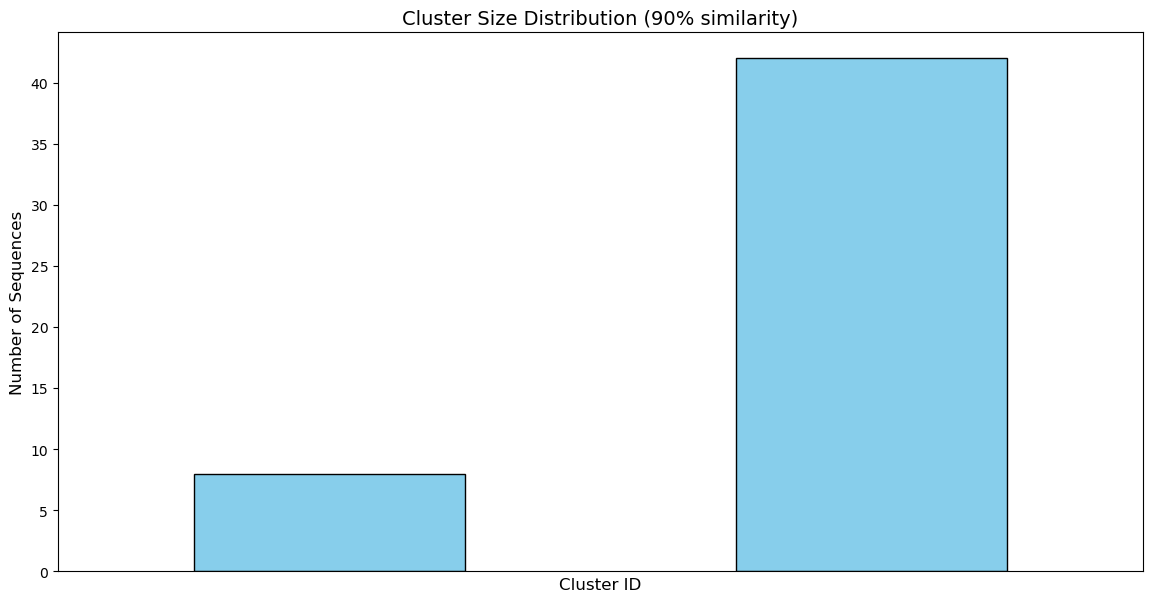

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Number of unique clusters
num_unique_clusters = df_unimol['mmseqs_representative_cluster_seq_0p9_similarity'].nunique()
print(f"Number of unique clusters: {num_unique_clusters}")

# Cluster size distribution
cluster_counts = df_unimol.groupby('mmseqs_representative_cluster_seq_0p9_similarity').size()

plt.figure(figsize=(14, 7))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Size Distribution (90% similarity)', fontsize=14)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Sequences', fontsize=12)
plt.xticks([])  # remove x-tick labels
#plt.show()

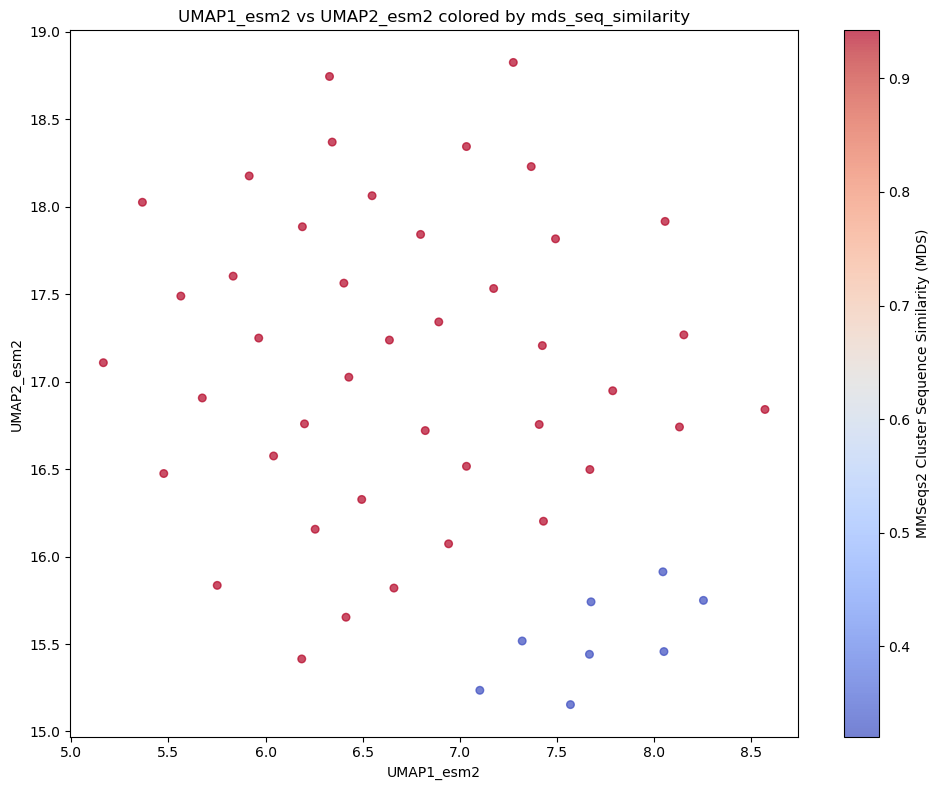

In [40]:
def plot_embedding_colored_by_property(df, x='UMAP1_esm2', y='UMAP2_esm2', color_by='mds1'):
    """
    Plot UMAP/t-SNE/PCA reduced embeddings colored by mmseqs2 cluster sequence similarity.
    """
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df[x], df[y], c=df[color_by], cmap='coolwarm', s=30, alpha=0.7)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y} colored by {color_by}')
    plt.colorbar(scatter, label='MMSeqs2 Cluster Sequence Similarity (MDS)')
    plt.tight_layout()
    plt.show()

plot_embedding_colored_by_property(df_unimol, x='UMAP1_esm2', y='UMAP2_esm2', color_by='mds_seq_similarity')


### Characterizing substrate landscape

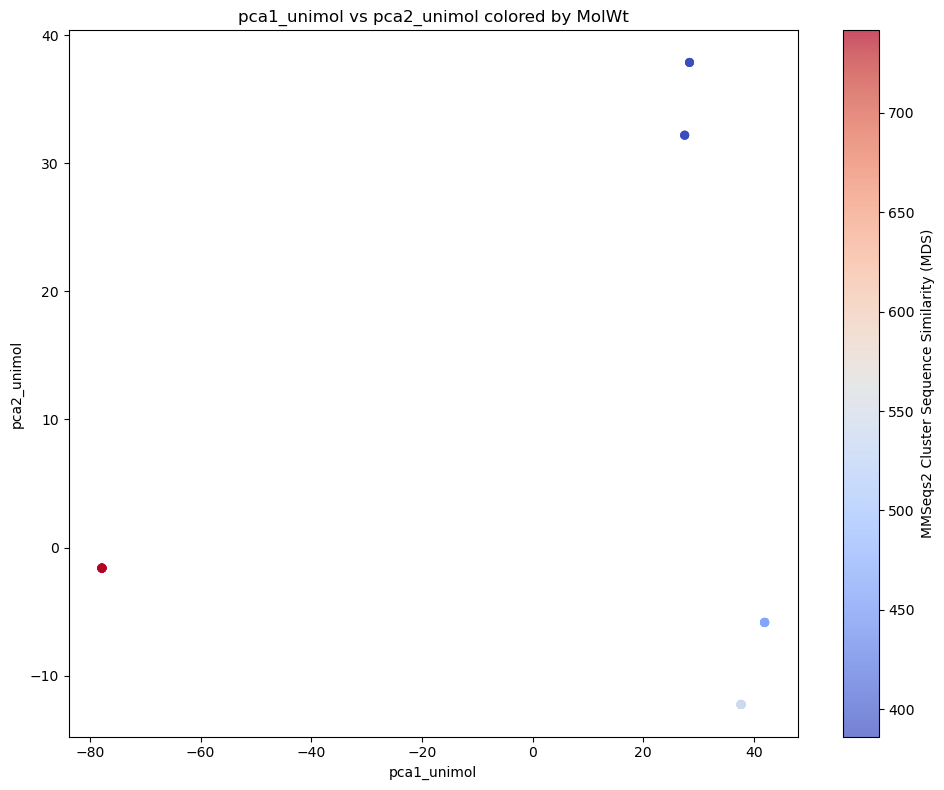

In [ ]:
# Dimensionality reduced substrate embeddings colored by molecular descriptors

plot_embedding_colored_by_property(df_unimol, x='pca1_unimol', y='pca2_unimol', color_by='MolWt')

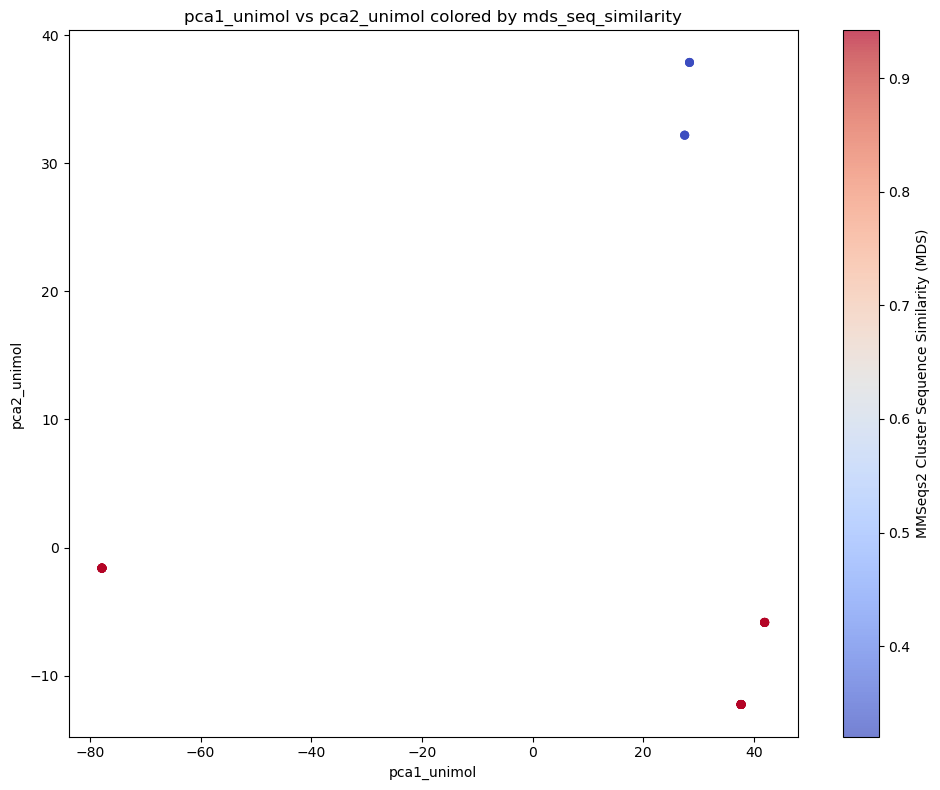

In [43]:
# Dimensionality reduced substrate embeddings colored by MMseqs2 cluster similarity

plot_embedding_colored_by_property(df_unimol, x='pca1_unimol', y='pca2_unimol', color_by='mds_seq_similarity')

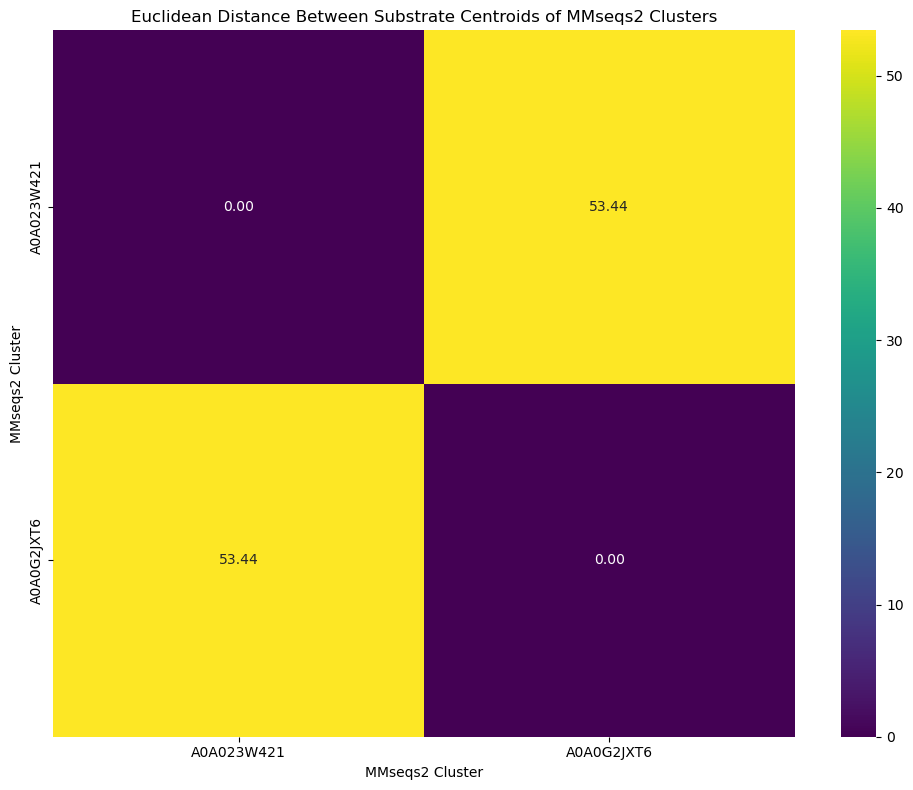

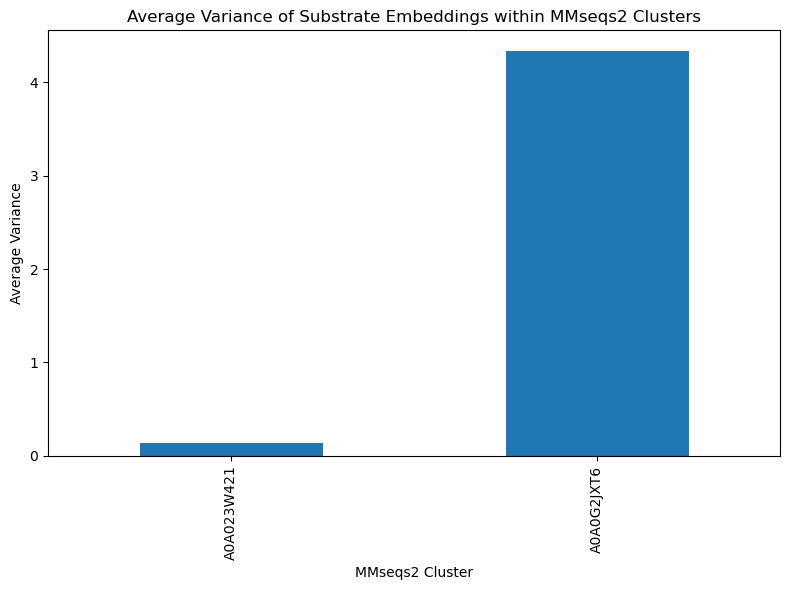

In [ ]:
# Quantitative analysis of substrate similarity within MMseqs2 clusters

import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import seaborn as sns

def quantitative_substrate_analysis(df, embedding_column='unimol_repr', cluster_column='mmseqs_representative_cluster_seq_0p9_similarity'):
    """
    Calculates centroid distances and variances for visualization.
    """
    grouped = df.groupby(cluster_column)[embedding_column].apply(list)
    cluster_centroids = {}
    cluster_variances = {}
    for cluster, embeddings_list in grouped.items():
        if embeddings_list:
            embeddings_array = np.array([np.array(emb).flatten() for emb in embeddings_list])
            if embeddings_array.ndim > 1 and embeddings_array.shape[1] > 0:
                cluster_centroids[cluster] = np.mean(embeddings_array, axis=0)
                cluster_variances[cluster] = np.mean(np.var(embeddings_array, axis=0))
            else:
                cluster_variances[cluster] = np.nan
        else:
            cluster_variances[cluster] = np.nan

    clusters = list(cluster_centroids.keys())
    distance_matrix = pd.DataFrame(index=clusters, columns=clusters)
    for i, cluster1 in enumerate(clusters):
        for j, cluster2 in enumerate(clusters):
            if cluster1 in cluster_centroids and cluster2 in cluster_centroids:
                dist = euclidean(cluster_centroids[cluster1], cluster_centroids[cluster2])
                distance_matrix.loc[cluster1, cluster2] = dist
            else:
                distance_matrix.loc[cluster1, cluster2] = np.nan

    variance_df = pd.Series(cluster_variances, name='Average Variance')
    return distance_matrix, variance_df

distance_matrix, variance_df = quantitative_substrate_analysis(df_unimol, cluster_column='mmseqs_representative_cluster_seq_0p9_similarity')

# Heatmap of Centroid Distances
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix.astype(float), annot=True, cmap='viridis', fmt=".2f")
plt.title('Euclidean Distance Between Substrate Centroids of MMseqs2 Clusters')
plt.xlabel('MMseqs2 Cluster')
plt.ylabel('MMseqs2 Cluster')
plt.tight_layout()
plt.show()

# Bar Chart of Cluster Variance
plt.figure(figsize=(8, 6))
variance_df.sort_values().plot(kind='bar')
plt.title('Average Variance of Substrate Embeddings within MMseqs2 Clusters')
plt.xlabel('MMseqs2 Cluster')
plt.ylabel('Average Variance')
plt.tight_layout()
plt.show()

# The centroid gives you a central "average" UniMol embedding for the substrates associated with each enzyme cluster.
# The average variance gives you a measure of how spread out the substrate embeddings are within each cluster. 
# A lower variance suggests that the substrates of enzymes in that cluster are more structurally similar to each other (according to UniMol).

# The Euclidean distance  between the centroids of two different clusters gives you an idea 
# of how structurally similar the average preferred substrates are for those two enzyme clusters. 
# Smaller distances suggest more similar average substrate preferences.


Visualization:

Dimensionality Reduction: Use techniques like PCA or t-SNE to reduce the high-dimensional UniMol embeddings to 2 or 3 dimensions and then plot them. Color-code the points by the MMseqs2 cluster of the enzyme that uses that substrate. If substrates of enzymes within the same cluster tend to group together in the embedding space, it suggests a correlation.
You could also color-code by other substrate properties if you have them.

Quantitative Analysis:

Calculate the average or centroid embedding for the substrates associated with each MMseqs2 cluster. Then, compare the distances between these centroid embeddings of different clusters. Smaller distances might indicate that the clusters of enzymes prefer structurally similar substrates.
For each cluster, calculate the variance or spread of the substrate embeddings. A lower variance within a cluster might suggest that the enzymes in that cluster prefer a more structurally homogeneous set of substrates.